In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from neuralprophet import NeuralProphet
import pickle

C:\Users\msi\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
#!pip install neuralprophet

In [3]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
Melbourne=df[df['Location']=='Melbourne']
Melbourne['Date']=pd.to_datetime(Melbourne['Date']) #convert object type to datetime type
Melbourne.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\msi\AppData\Local\Temp\ipykernel_10948\2839741187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Melbourne['Date']=pd.to_datetime(Melbourne['Date']) #convert object type to datetime type



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [10]:
Melbourne.shape

(3193, 23)

In [11]:
Melbourne.Date.min()

Timestamp('2008-07-01 00:00:00')

In [12]:
Melbourne.Date.max()

Timestamp('2017-06-25 00:00:00')

In [13]:
Melbourne.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

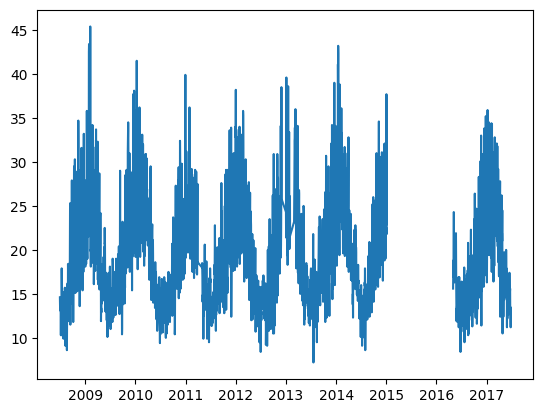

In [14]:
plt.plot(Melbourne.Date,Melbourne.Temp3pm)

WARNING - (py.warnings._showwarnmsg) - C:\Users\msi\AppData\Local\Temp\ipykernel_10948\1400719569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Melbourne['Year']=Melbourne['Date'].apply(lambda x:x.year)



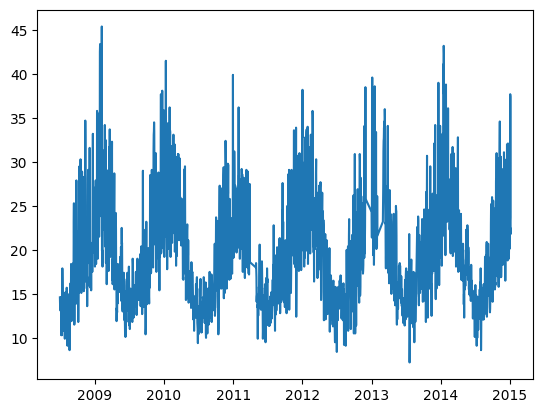

In [15]:
Melbourne['Year']=Melbourne['Date'].apply(lambda x:x.year)
Melbourne=Melbourne[Melbourne['Year']<=2015]
plt.plot(Melbourne.Date,Melbourne.Temp3pm)

In [16]:
Melbourne.shape

(2651, 24)

In [17]:
Melbourne.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No,2008
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes,2008
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No,2008
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No,2008
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No,2008


In [18]:
Melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2651 entries, 67200 to 69850
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2651 non-null   datetime64[ns]
 1   Location       2651 non-null   object        
 2   MinTemp        2292 non-null   float64       
 3   MaxTemp        2291 non-null   float64       
 4   Rainfall       2014 non-null   float64       
 5   Evaporation    2649 non-null   float64       
 6   Sunshine       2650 non-null   float64       
 7   WindGustDir    2638 non-null   object        
 8   WindGustSpeed  2638 non-null   float64       
 9   WindDir9am     2615 non-null   object        
 10  WindDir3pm     2643 non-null   object        
 11  WindSpeed9am   2649 non-null   float64       
 12  WindSpeed3pm   2651 non-null   float64       
 13  Humidity9am    2290 non-null   float64       
 14  Humidity3pm    2285 non-null   float64       
 15  Pressure9am    2

In [19]:
data=Melbourne[['Date','Temp3pm']]

In [20]:
data.shape

(2651, 2)

In [21]:
data.dropna(inplace=True)

WARNING - (py.warnings._showwarnmsg) - C:\Users\msi\AppData\Local\Temp\ipykernel_10948\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



In [22]:
data.shape

(2288, 2)

In [23]:
data.columns=['ds','y']
data.head()

,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


## Train the model :

In [24]:
m= NeuralProphet()

In [25]:
m.fit(data, freq='D', epochs=750)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (72) is too small than the required number for the learning rate finder (234). The results might not be optimal.


Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,33.594925,40.840363,0.764249,0.0,0
1,32.064194,39.142365,0.716854,0.0,1
2,30.647762,37.534740,0.672889,0.0,2
3,29.205299,35.864529,0.627380,0.0,3
4,27.712303,34.193027,0.581875,0.0,4
...,...,...,...,...,...
745,3.016764,3.930197,0.010830,0.0,745
746,3.026294,3.932343,0.010877,0.0,746
747,3.020757,3.946851,0.010831,0.0,747
748,3.028149,3.951903,0.010913,0.0,748


In [26]:
future=m.make_future_dataframe(data,periods=900)
future.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y
0,2015-01-06,None
1,2015-01-07,None
2,2015-01-08,None
3,2015-01-09,None
4,2015-01-10,None


In [27]:
future.shape

(900, 2)

In [28]:
forecast=m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 72it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.887638,20.274933,5.319223,0.293482
1,2015-01-07,None,25.713261,20.275738,5.459532,-0.022007
2,2015-01-08,None,25.947414,20.276543,5.595789,0.075084
3,2015-01-09,None,26.046043,20.277346,5.727272,0.041427
4,2015-01-10,None,26.107281,20.278151,5.853290,-0.024162


In [32]:
plot1=m.plot(forecast)
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '27624d15-aa76-4413-a0df-fb994554535c',
              'x': array([datetime.datetime(2015, 1, 6, 0, 0),
                          datetime.datetime(2015, 1, 7, 0, 0),
                          datetime.datetime(2015, 1, 8, 0, 0), ...,
                          datetime.datetime(2017, 6, 21, 0, 0),
                          datetime.datetime(2017, 6, 22, 0, 0),
                          datetime.datetime(2017, 6, 23, 0, 0)], dtype=object),
              'y': array([25.88763809, 25.71326065, 25.9474144 , ..., 15.26077366, 15.31510448,
                          15.24329567])},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '19d

In [34]:
plot2=m.plot_components(forecast)
plot2

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': '26264673-6417-45dc-bb75-327e25fef25c',
              'x': array([datetime.datetime(2015, 1, 6, 0, 0),
                          datetime.datetime(2015, 1, 7, 0, 0),
                          datetime.datetime(2015, 1, 8, 0, 0), ...,
                          datetime.datetime(2017, 6, 21, 0, 0),
                          datetime.datetime(2017, 6, 22, 0, 0),
                          datetime.datetime(2017, 6, 23, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([20.27493286, 20.27573776, 20.27654266, ..., 20.99695206, 20.99775696,
                          20.99856186]),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',
  